In [275]:
#Load packages
import pandas as pd
import numpy as np
import cufflinks as cf
import seaborn as sns
from plotly.offline import plot,iplot,download_plotlyjs,init_notebook_mode
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import featuretools as ft
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.externals import joblib

In [216]:
init_notebook_mode(connected=True)
cf.go_offline()

In [217]:
#load the dataset
wine=pd.read_csv('datasets/wine.csv')

In [218]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [219]:
#Check the data structures
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [220]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [221]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# 1.Explanatory Data Analysis(EDA)

## 1.1Univariate Analysis

In [222]:
#split dataset function
def splitd(dataset,test_size):
    split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
    for train_index,test_index in split.split(dataset,dataset['quality']):
        train=wine.iloc[train_index]
        test=wine.iloc[test_index]
    return train,test    

In [223]:
train,test=splitd(wine,0.2)
id_train=train.index
id_test=test.index

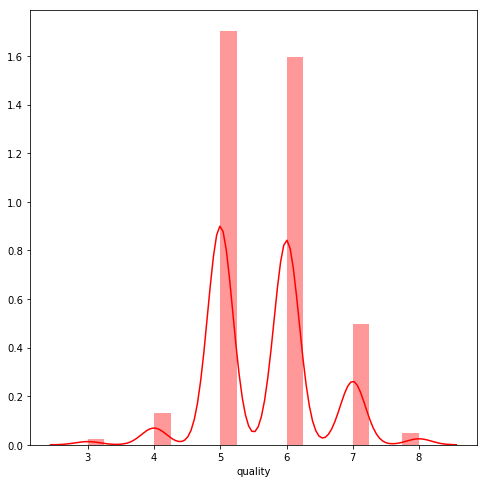

In [224]:
#Distribution of label quality
fig,ax=plt.subplots()
sns.distplot(train['quality'],color='r',bins=20)
fig.set_size_inches(8,8)

In [225]:
#Find numeric columns
train.select_dtypes(include=['number']).head()
#All features are numeric

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            6.7             0.855         0.02             1.9      0.064   
1558            6.9             0.630         0.33             6.7      0.235   
344            11.9             0.570         0.50             2.6      0.082   
924             8.6             0.470         0.27             2.3      0.055   
971            10.4             0.260         0.48             1.9      0.066   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1542                 29.0                  38.0  0.99472  3.30       0.56   
1558                 66.0                 115.0  0.99787  3.22       0.56   
344                   6.0                  32.0  1.00060  3.12       0.78   
924                  14.0                  28.0  0.99516  3.18       0.80   
971                   6.0                  10.0  0.99724  3.33       0.87   

      alcohol  quality  
1542    10.75        6  
1558     9.50        5  
344     10.70        6  
924     11.20        5  
971     10.90        6

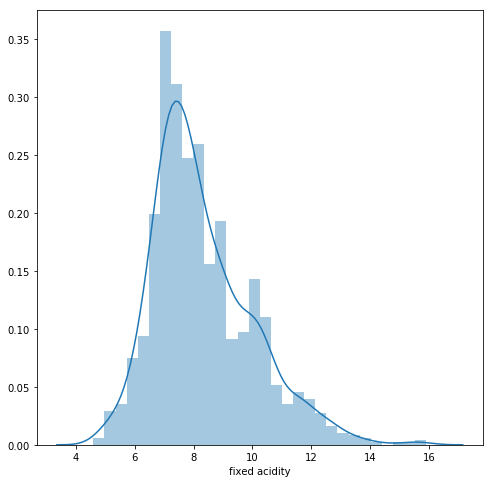

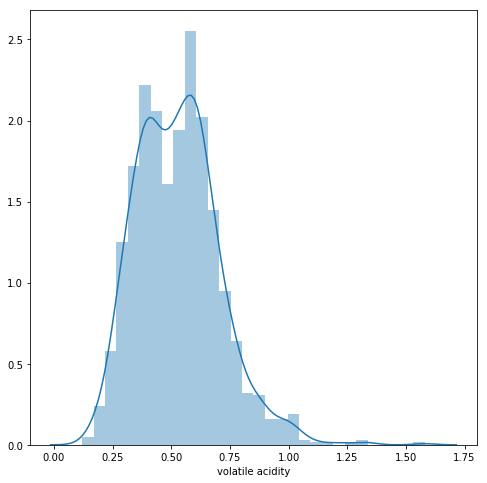

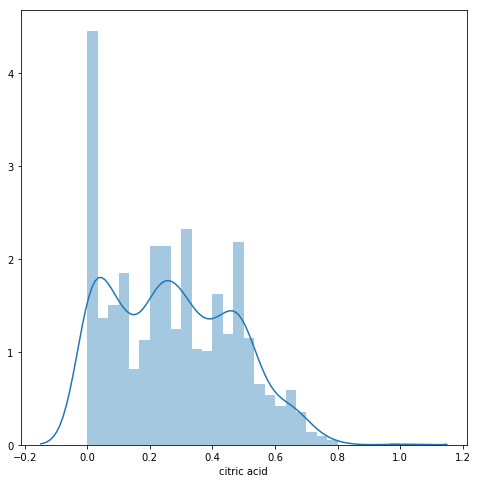

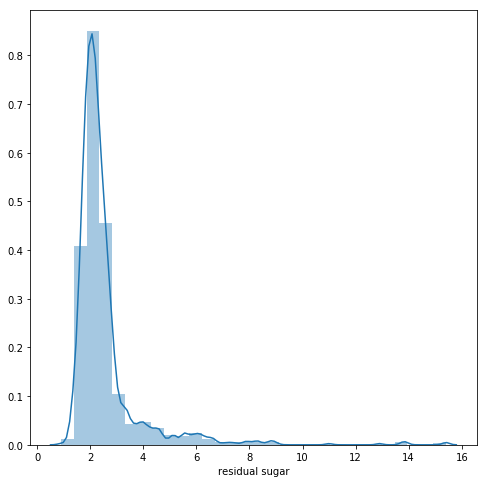

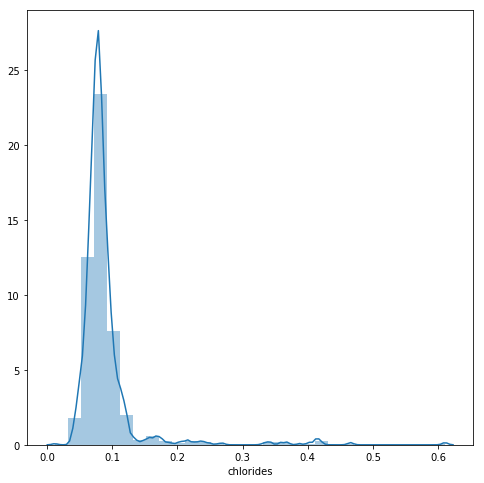

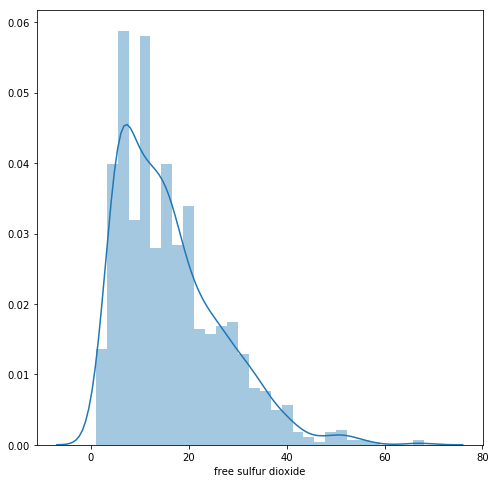

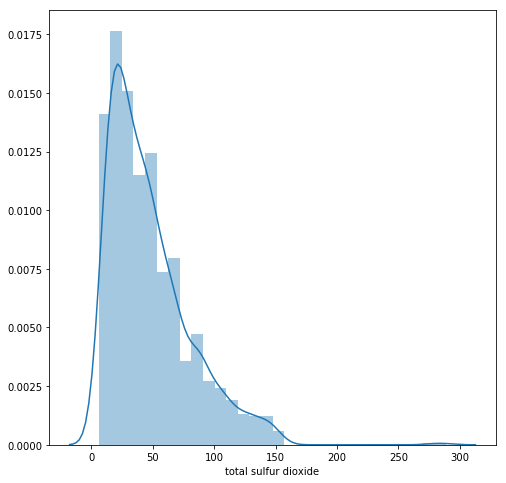

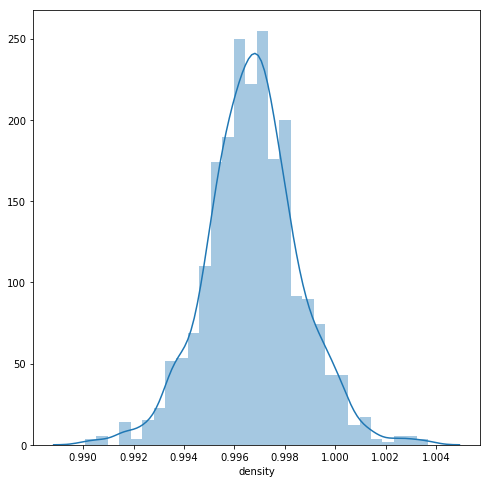

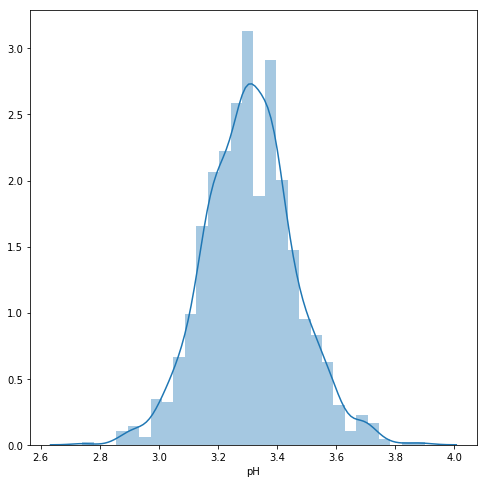

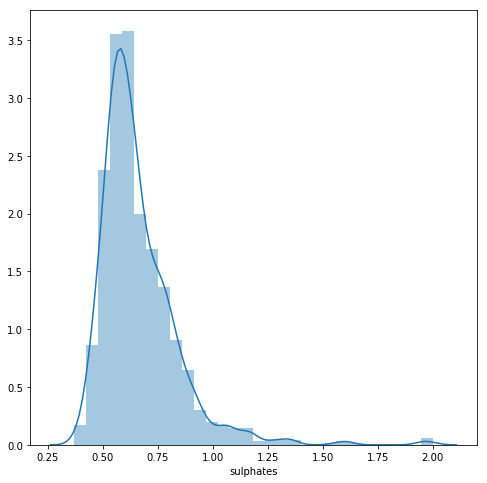

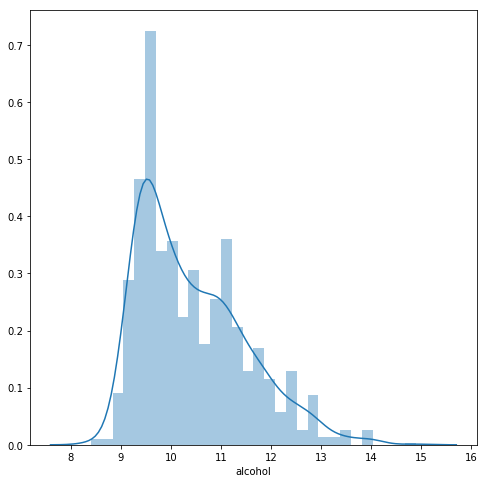

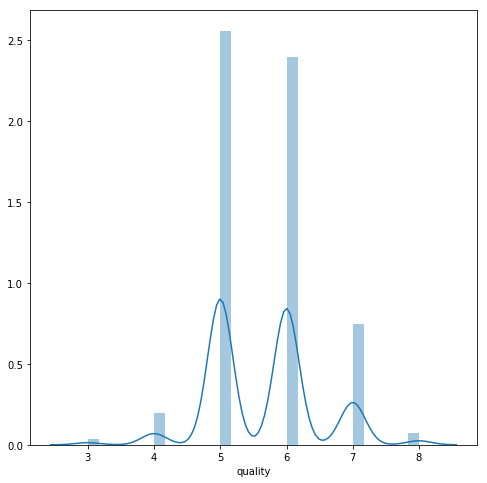

In [226]:
#Distplot for all numeric dtypes
for t in train:
    fig,ax=plt.subplots()
    sns.distplot(train[t],bins=30)
    fig.set_size_inches(8,8)
    

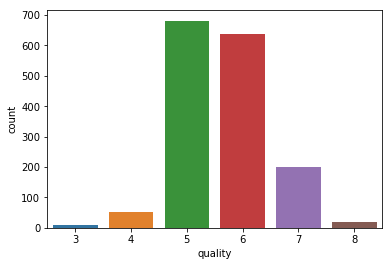

In [227]:
sns.countplot(x=wine['quality'])

In [228]:
#log transformation
train['residual sugar']=np.log(train['residual sugar'])
train['alcohol']=np.log(train['alcohol'])
train['free sulfur dioxide']=np.log(train['free sulfur dioxide'])
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            6.7             0.855         0.02        0.641854      0.064   
1558            6.9             0.630         0.33        1.902108      0.235   
344            11.9             0.570         0.50        0.955511      0.082   
924             8.6             0.470         0.27        0.832909      0.055   
971            10.4             0.260         0.48        0.641854      0.066   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1542             3.367296                  38.0  0.99472  3.30       0.56   
1558             4.189655                 115.0  0.99787  3.22       0.56   
344              1.791759                  32.0  1.00060  3.12       0.78   
924              2.639057                  28.0  0.99516  3.18       0.80   
971              1.791759                  10.0  0.99724  3.33       0.87   

       alcohol  quality  
1542  2.374906        6  
1558  2.251292        5  
344   2.370244        6  
924   2.415914        5  
971   2.388763        6

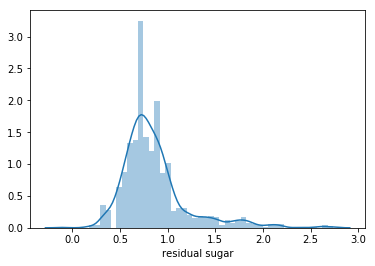

In [229]:
sns.distplot(train['residual sugar'])

Text(0.5, 1.0, 'Correlation matrix')

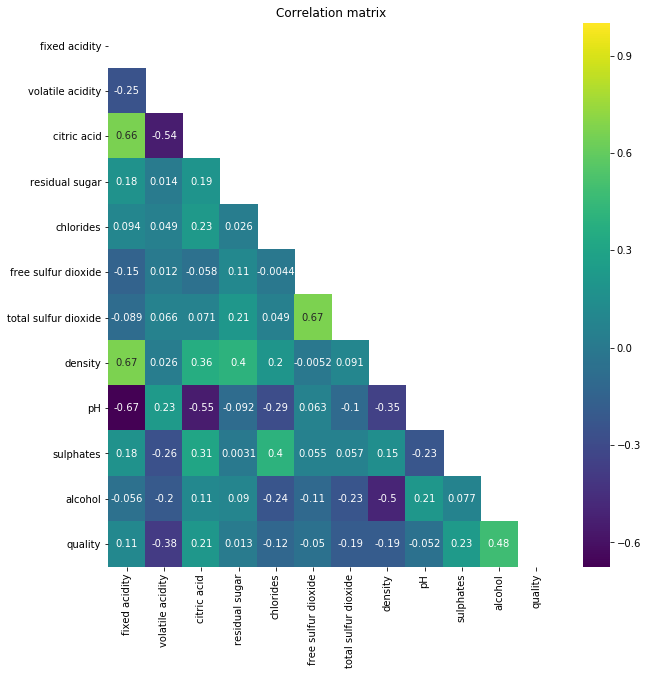

In [230]:
#correlatin matrix
corr=train.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
fif,ax=plt.subplots()
fif.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,cmap='viridis',annot=True)
plt.title('Correlation matrix')

# 1.2 Bivariate analysis

In [231]:
#plotly scatterplot
q=go.Scatter(x=train['alcohol'],y=train['quality'],
            marker=dict(color='rgb(30,30,30)',size=10),
            mode='markers+text')
data=[q]
layout=dict(title='Scatterplot of alcohol vs quality')
fig=dict(data=data,layout=layout)
iplot(fig)

In [232]:
q=go.Scatter(x=train['sulphates'],y=train['quality'],
            marker=dict(color='rgb(130,130,30)',size=10),
            mode='markers+text')
data=[q]
layout=dict(title='Scatterplot of sulphates vs quality')
fig=dict(data=data,layout=layout)
iplot(fig)

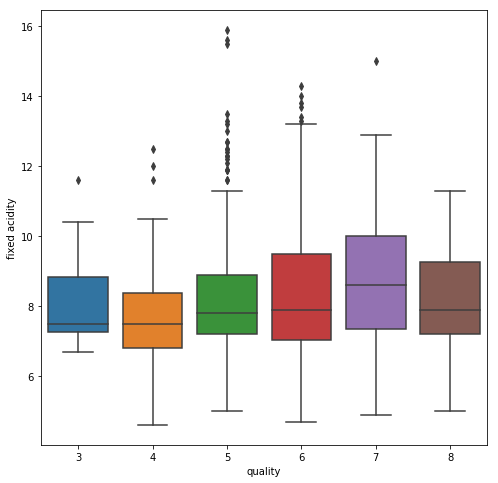

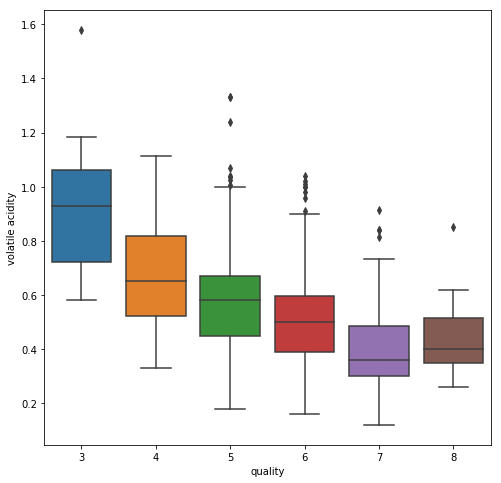

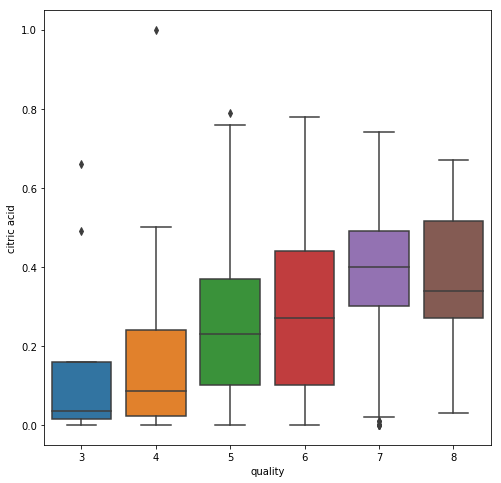

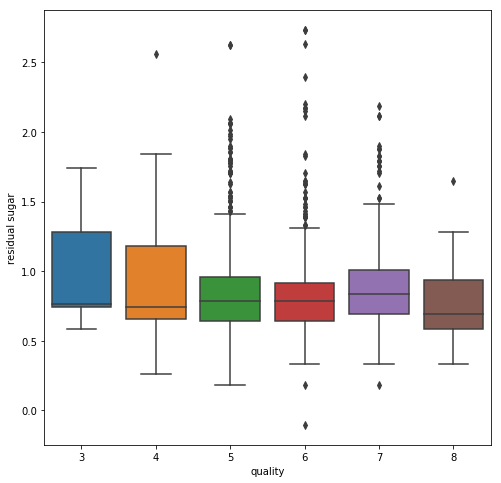

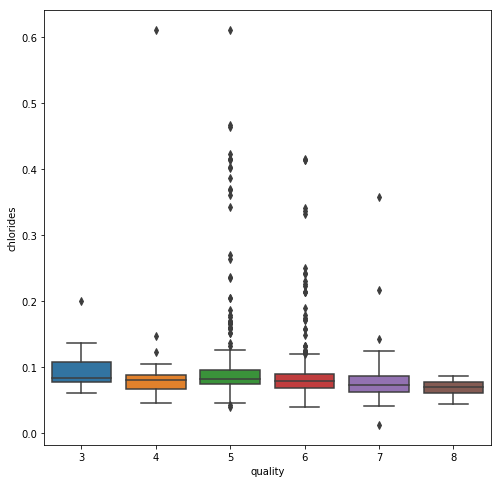

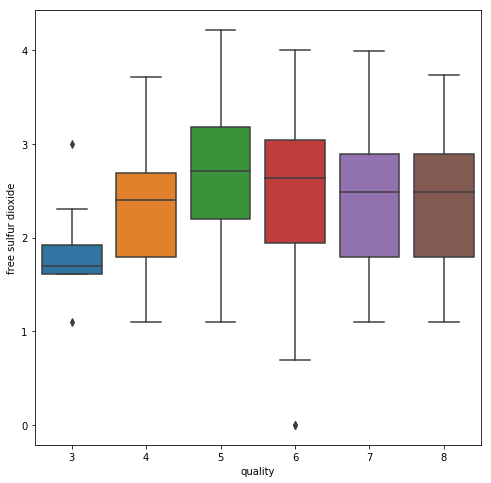

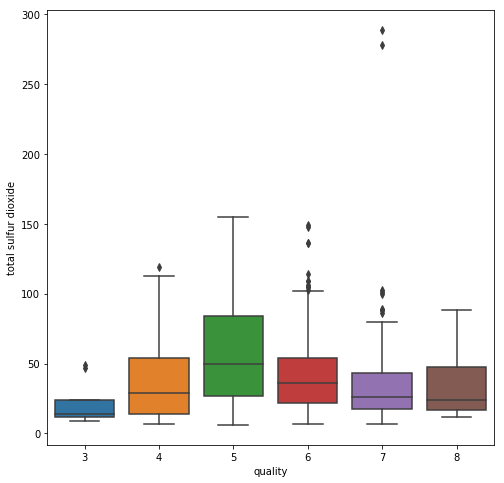

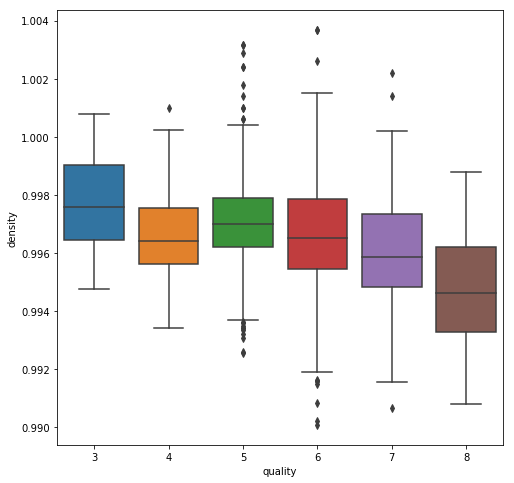

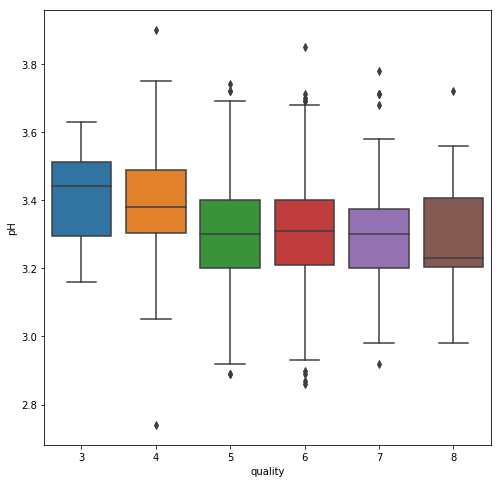

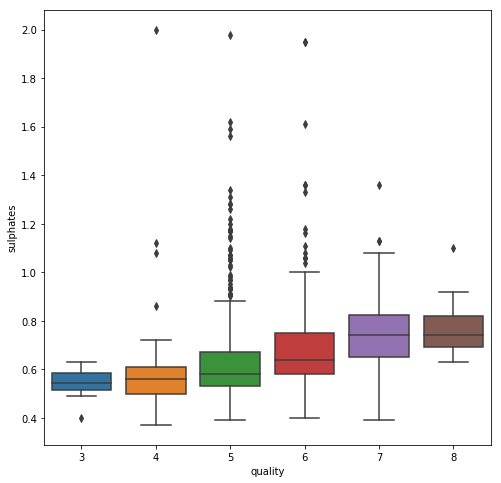

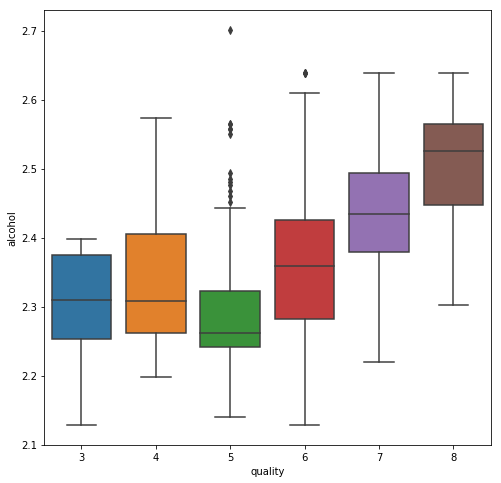

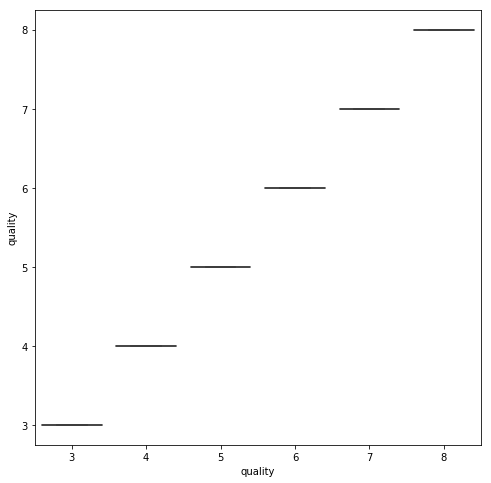

In [233]:
#boxplots for all numeric feature with quality
for q in train:
    fig,ax=plt.subplots()
    sns.boxplot(x=train['quality'],y=train[q])
    fig.set_size_inches(8,8)

In [234]:
label=train['quality'].copy()


# 2.0Data Pre-processing

In [236]:
train=wine2.loc[id_train]
test=wine2.loc[id_test]

In [237]:
#Check for missing data
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [238]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            7.5             0.770         0.20        8.100000      0.098   
1558            9.9             0.630         0.24        2.400000      0.077   
344             6.3             0.390         0.16        0.336472      0.080   
924             6.9             0.635         0.17        0.875469      0.241   
971            12.0             0.280         0.49        0.641854      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1542            30.000000                  92.0  0.99892  3.20       0.58   
1558             6.000000                  33.0  0.99740  3.09       0.57   
344              2.397895                  23.0  0.99550  3.34       0.56   
924              1.791759                  18.0  0.99610  3.40       0.59   
971              2.302585                  21.0  0.99760  2.98       0.66   

       alcohol  quality  
1542  9.200000        5  
1558  9.400000        5  
344   2.230014        5  
924   2.332144        6  
971   2.292535        7

In [239]:
#detect outlier
def detect_outliers(feature,dataset):
    
    outlier_indices=[]
    
    for col in feature:
        
        #lower quatile
        
        lower_quatile=np.percentile(dataset[col],25)
        # upper quatile
        
        upper_quatile=np.percentile(dataset[col],75)
        
        #interquatile range
        interquatile_range=upper_quatile-lower_quatile
        
        #outlier step
        outlier_step=1.5*interquatile_range
        #outlier columns
        outlier_col=dataset[(dataset[col]<lower_quatile-outlier_step)|(dataset[col]>upper_quatile+outlier_step)].index
    #return oulier indices    
    outlier_indices.extend(outlier_col)
    
    return outlier_indices
        


In [240]:
outliers=detect_outliers(['quality','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','pH','density',
                         'total sulfur dioxide','sulphates'],train)
train.loc[outliers].head(8)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
814             8.6             0.725         0.24        1.887070      0.117   
186             7.8             0.410         0.68        0.530628      0.467   
402             8.6             0.490         0.28        0.641854      0.110   
1077           10.4             0.240         0.49        0.587787      0.075   
183             8.6             0.635         0.68        0.587787      0.403   
1010            7.7             0.410         0.76        0.587787      0.611   
578             8.5             0.440         0.50        0.641854      0.369   
384             7.9             0.320         0.51        0.587787      0.341   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
814              3.433987                 134.0  1.00140  3.32       1.07   
186              2.890372                  69.0  0.99730  3.08       1.31   
402              2.995732                 136.0  0.99720  2.93       1.95   
1077             1.791759                  20.0  0.99770  3.18       1.06   
183              2.944439                  56.0  0.99632  3.02       1.15   
1010             2.079442                  45.0  0.99680  3.06       1.26   
578              2.708050                  38.0  0.99634  3.01       1.10   
384              2.833213                  56.0  0.99690  3.04       1.08   

       alcohol  quality  
814   2.230014        5  
186   2.230014        5  
402   2.292535        6  
1077  2.397895        6  
183   2.230014        5  
1010  2.240710        5  
578   2.240710        5  
384   2.219203        6

In [241]:
#remove outliers 
train.drop(outliers,axis=0,inplace=True)

In [242]:
train.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            7.5             0.770         0.20        8.100000      0.098   
1558            9.9             0.630         0.24        2.400000      0.077   
344             6.3             0.390         0.16        0.336472      0.080   
924             6.9             0.635         0.17        0.875469      0.241   
971            12.0             0.280         0.49        0.641854      0.074   
197             6.9             0.540         0.04        1.098612      0.077   
130             8.2             0.200         0.43        0.916291      0.076   
222             7.1             0.340         0.28        0.693147      0.082   
1595            7.1             0.460         0.14        2.800000      0.076   
1156            9.6             0.380         0.42        0.641854      0.071   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1542            30.000000                  92.0  0.99892  3.20       0.58   
1558             6.000000                  33.0  0.99740  3.09       0.57   
344              2.397895                  23.0  0.99550  3.34       0.56   
924              1.791759                  18.0  0.99610  3.40       0.59   
971              2.302585                  21.0  0.99760  2.98       0.66   
197              1.945910                  27.0  0.99870  3.69       0.91   
130              3.433987                  51.0  0.99672  3.53       0.81   
222              3.433987                  68.0  0.99694  3.45       0.48   
1595            15.000000                  37.0  0.99624  3.36       0.49   
1156             1.609438                  13.0  0.99659  3.15       0.75   

        alcohol  quality  
1542   9.200000        5  
1558   9.400000        5  
344    2.230014        5  
924    2.332144        6  
971    2.292535        7  
197    2.240710        6  
130    2.341806        6  
222    2.240710        5  
1595  10.700000        5  
1156   2.351375        6

In [243]:
#Check for categorical data
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [244]:
np.percentile(train['fixed acidity'],90)

10.660000000000013

In [245]:
wine2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.7             0.855         0.02        0.641854      0.064   
1            6.9             0.630         0.33        1.902108      0.235   
2           11.9             0.570         0.50        0.955511      0.082   
3            8.6             0.470         0.27        0.832909      0.055   
4           10.4             0.260         0.48        0.641854      0.066   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             3.367296                  38.0  0.99472  3.30       0.56   
1             4.189655                 115.0  0.99787  3.22       0.56   
2             1.791759                  32.0  1.00060  3.12       0.78   
3             2.639057                  28.0  0.99516  3.18       0.80   
4             1.791759                  10.0  0.99724  3.33       0.87   

    alcohol  quality  
0  2.374906        6  
1  2.251292        5  
2  2.370244        6  
3  2.415914        5  
4  2.388763        6

In [246]:
#remove the labels
label=train['quality'].copy()
tlabel=test['quality'].copy()
train.drop('quality',axis=1,inplace=True)
test.drop('quality',axis=1,inplace=True)

In [247]:
train.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [248]:
train.shape

(1235, 11)

# 3.0 Model building

In [249]:
def model(alg,train,label,test,tlabel):
    alg.fit(train,label)
    predictions=alg.predict(train)
    cv=cross_val_score(alg,train,label,cv=20,scoring='neg_mean_squared_error')
    train_rmse=np.sqrt(-cv)
    print("\nModel Report")
    print('RMSE mean on train set is',np.mean(train_rmse))
    test_prediction=alg.predict(test)
    test_rmse=np.sqrt(mean_squared_error(tlabel,test_prediction))
    print('RMSE mean on test set is',test_rmse)
    
    

In [250]:
#Linear regression
lr=LinearRegression()
model(lr,train,label,test,tlabel)


Model Report
RMSE mean on train set is 0.666890241383175
RMSE mean on test set is 0.6964584031388503


In [251]:
#decision tree
dt=DecisionTreeRegressor(max_depth=15)
model(dt,train,label,test,tlabel)
coef3 = pd.Series(dt.feature_importances_).sort_values(ascending=False)
coef3.iplot(kind='bar', title='Feature Importances',color='rgb(0,0,200)')


Model Report
RMSE mean on train set is 0.8856893134309496
RMSE mean on test set is 0.7487581956885956


In [252]:
#Random forest
rt=RandomForestRegressor(n_estimators=150,max_depth=1000)
model(rt,train,label,test,tlabel)
coef3 = pd.Series(rt.feature_importances_).sort_values(ascending=False)
coef3.iplot(kind='bar', title='Feature Importances',color='rgb(230,18,190)')


Model Report
RMSE mean on train set is 0.6126027388128772
RMSE mean on test set is 0.5744348672100839


In [253]:
#Gradient boosting
gr=GradientBoostingRegressor(learning_rate=0.2)
model(gr,train,label,test,tlabel)
coef3 = pd.Series(gr.feature_importances_).sort_values(ascending=False)
coef3.iplot(kind='bar', title='Feature Importances',color='rgb(20,25,67)')


Model Report
RMSE mean on train set is 0.6452800379082431
RMSE mean on test set is 0.6170168269654527


In [254]:
#svr
sv=SVR()
model(sv,train,label,test,tlabel)


Model Report
RMSE mean on train set is 0.7714818028346617
RMSE mean on test set is 0.6935499495129261


In [255]:
ls=Lasso(max_iter=100000)
model(ls,train,label,test,tlabel)


Model Report
RMSE mean on train set is 0.7980983613550684
RMSE mean on test set is 0.7666327543750117


In [262]:
rt.predict([[6.9,0.630,0.33,1.902108,0.235,4.189655,115.0,0.99787,3.22,0.56,2.251292]])

array([5.12])

In [263]:
rt.predict([[11.9,0.570,0.50,0.955511,0.082,1.791759,32.0,1.00060,3.12,0.78,2.370244]])

array([5.98])

In [264]:
rt.predict([[15.9,0.360,0.65,2.014903,0.096,3.091042,71.0,0.99760,2.98,0.84,2.701361]])

array([5.46])

In [265]:
rt.predict([[8.5,0.180,0.51,0.559616,0.071,3.806662,88.0,0.99524,3.33,0.76,2.468100]])

array([6.58666667])

In [273]:
rt.predict([[5.6,0.85,0.05,0.336472,0.045,2.484907,88.0,0.99240,3.56,0.82,2.557227]])

array([7.64])

In [276]:
joblib.dump(rt,'rt.pkl')

['rt.pkl']